# AutoregressionAD algorithm
Learn how to detect anomalous CPU behavior using the [AutorgressionAD aglorithm]( https://adtk.readthedocs.io/en/stable/notebooks/demo.html#AutoregressionAD) 

AutoregressionAD detects anomalous changes of autoregressive behavior in time series.

AutoregressionAD can capture changes of autoregressive relationship (the relationship between a data point and points in its near past) and could be used for cyclic (but not seasonal) series in some situations.

## 1. Import Dependencies.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Step Two:  Convert data to a DataFrame 

Convert data from one of the following sources:

- InfluxDB 

- CSV


### To convert from InfluxDB
Use the Python InfluxDB Client to query data and return it as a Panda DataFrame. For more information, [Getting Started with InfluxDB and Pandas](../Getting_Started_with_InfluxDB_and_Pandas.ipynb). Then continue to Step 3.

### To convert from CSV
Run the following code to convert csv data to a Panda DataFrame:

In [2]:
s = pd.read_csv('./sample_data/sample-data.csv')
s.head()

,timestamp,value,label
0,1469376000,0.847300,0
1,1469376300,-0.036137,0
2,1469376600,0.074292,0
3,1469376900,0.074292,0
4,1469377200,-0.036137,0


## Step Three: Prepare Data

To prepare the DataFrame to be consumed by our mad() function, run the following code to do the following:

- Drop the label column
- Convert the timestamp column to a pandas datetime object
- Set the timestampe column as the index

In [3]:
s.drop(['label'], axis=1, inplace=True)
s["timestamp"] = pd.to_datetime(s["timestamp"], unit='s')
s = s.set_index("timestamp")
s.head()

,value
timestamp,
2016-07-24 16:00:00,0.847300
2016-07-24 16:05:00,-0.036137
2016-07-24 16:10:00,0.074292
2016-07-24 16:15:00,0.074292
2016-07-24 16:20:00,-0.036137


###  To visualize the data 
Run the following code to visualize the data:

<AxesSubplot:xlabel='timestamp'>

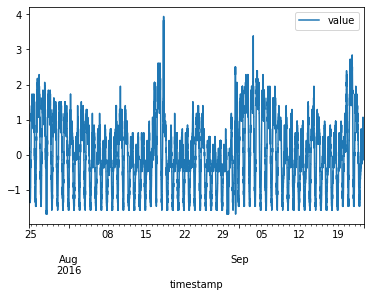

In [4]:
s.plot()

## Step Four: Apply AutoregressionAD

Use the [ADTK AutoregressionAD](https://adtk.readthedocs.io/en/stable/notebooks/demo.html#AutoregressionAD) function to find anomalies in the data.

In [5]:
from adtk.data import validate_series
# This functoin will check some common critical issues of time series that may cause problems if anomaly detection is performed without fixing them. The function will automatically fix some of them and raise errors for the others.
s = validate_series(s)

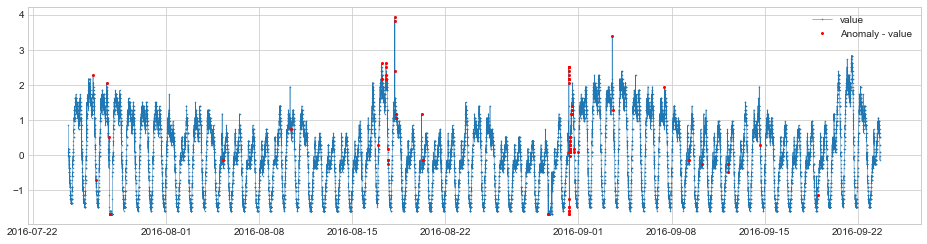

In [6]:
from adtk.detector import AutoregressionAD
from adtk.visualization import plot
autoregression_ad = AutoregressionAD(n_steps=10, step_size=20, c=3.0)
anomalies = autoregression_ad.fit_detect(s)
plot(s, anomaly=anomalies, ts_markersize=1, anomaly_color='red', anomaly_tag="marker", anomaly_markersize=2);